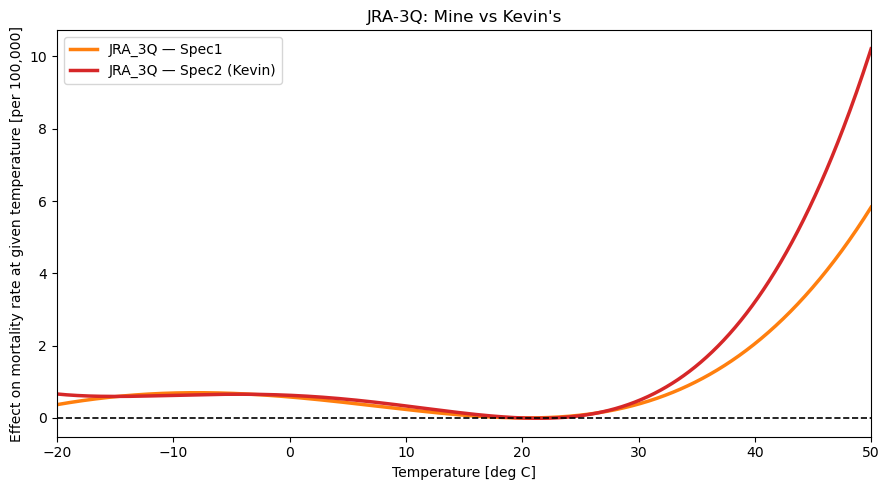

In [5]:
# Carleton-style effect plot (two curves, same product: JRA-3Q)
# Plots Δ mortality rate (per 100,000) relative to a reference temperature (T_ref=20°C)
# for Spec1 and Spec2-woAustria using your quartic coefficients.

import numpy as np
import matplotlib.pyplot as plt

# ── QUARTIC COEFFICIENTS ───────────────────────────────────────────────────────
# y(T) = c + b1*T + b2*T^2 + b3*T^3 + b4*T^4

# Spec1 (age-combined, JRA-3Q, Spec1)
spec1 = dict(b1=-0.0272409, b2=-0.0012554, b3=0.0000451, b4=6.58e-07, c=968.6794)

# Spec2-woAustria (age-combined, JRA-3Q) — gamma includes intercept last
spec2 = dict(b1=-0.0140316105983195, b2=-0.0017224652742285,
             b3=-0.00000633843289634, b4=0.00000246169898280,
             c=795.9875837642322)

def eval_quartic(T, coefs):
    return (coefs["c"]
            + coefs["b1"]*T
            + coefs["b2"]*(T**2)
            + coefs["b3"]*(T**3)
            + coefs["b4"]*(T**4))

# ── TEMPERATURE GRID + RE-CENTERING ────────────────────────────────────────────
T = np.linspace(-20, 50, 1000)   # °C, to match the look of the example
T_ref = 20.0                     # reference temperature for "effect" (Carleton uses ~20–22°C)

y1 = eval_quartic(T, spec1)
y2 = eval_quartic(T, spec2)

# Effect curves relative to T_ref (subtract the value at T_ref)
y1_eff = y1 - eval_quartic(np.array([T_ref]), spec1)[0]
y2_eff = y2 - eval_quartic(np.array([T_ref]), spec2)[0]

# ── PLOT ───────────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(T, y1_eff, lw=2.5, color='tab:orange', label='JRA_3Q — Spec1')
ax.plot(T, y2_eff, lw=2.5, color='tab:red',    label='JRA_3Q — Spec2 (Kevin)')

# zero line
ax.axhline(0, ls='--', lw=1.2, color='k')

# labels / title like the example
ax.set_title("JRA-3Q: Mine vs Kevin's")
ax.set_xlabel("Temperature [deg C]")
ax.set_ylabel("Effect on mortality rate at given temperature [per 100,000]")

# legend and layout
ax.legend(frameon=True)
ax.margins(x=0)
ax.grid(False)
plt.tight_layout()
plt.show()

# ── OPTIONAL: If you have the full covariance of coefficients for each spec,
# you can add shaded 95% CIs by the delta method. You'd compute Var(y(T)) = X(T)' Σ X(T),
# where X(T) = [T, T^2, T^3, T^4, 1] and Σ is the 5x5 covariance of [b1,b2,b3,b4,c].
# Then shade ax.fill_between(T, y_eff - 1.96*se, y_eff + 1.96*se, alpha=0.2, color=...) for each curve.
